# Portfolio Construction with Underlying Efficient Market Hypothesis Assumptions 

Today's modern financial market has changed in ways that were never shown at this scale over history. Portfolio construction today still takes the traditional approaches to the process. The new world will forever change how people analyze financial markets. I believe that we are in a state of transition where old portfolio managers still take traditional approaches and new managers are changing the landscape in which portfolios are constructed. The efficent market theory states that:
> "The primary role of the capital market is allocation of ownership of the economy's capital stock. In general terms, the ideal is a market in which prices provide accurate signals for resource allocation: that is, a market in which firms can make production-investment decisions, and investors can choose among the securities that represent ownership of firms' activities under the assumption that security prices at any time 'fully reflect' all available information. A market in which prices always "fully reflect" available information is called 'efficient.'" (Fama, 1970) 

### Modern Portfolio Theory 
Markowitz's modern portfolio theory states that securities have either high risk and high return or low risk and low return. He argued that an optimal mix of assets exists based on their individual historical risk and return profiles. Markowitz's stated that diversified portfolios can offer greater returns for the level of risk an investor is willing to take. The effienct frontier is essential for creating client portfolios that will satisfy their risk and return objective. Commonly used by investment advisory firms as well and instituional investment firms. The effiecient frontier offers a overview of the optimal portfolio for any level of risk, that is extremely great place to start for any portfolio contruction.

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
#imported a library that I created so that I wouldn't clutter this notebook
from mylib.mean_variance import *
import statsmodels.api as sm
benchmark = "^IXIC"
plt.rcParams.update({"font.size":40})
start = datetime.datetime(2011,1,1)
end = datetime.datetime.today()
rf = web.DataReader("^TNX", "yahoo", start = datetime.datetime(2021,10,1), end = end)["Adj Close"]
rf = pd.DataFrame(rf)
ticker_lst = ["JNJ", "AMZN", "GE", 
              "DE", "BX", "AAPL", 
              "KO", "OKTA", "BND"]


In [2]:
portfolios = mean_variance(ticker_lst, 
                           num_ports = 10000, 
                           start = start, 
                           end = end, 
                           benchmark = benchmark,
                           rf = rf["Adj Close"][-1])
portfolios

Returns  Volatility  Portfolio Beta  Jensen's Alpha  JNJ Weight  \
0     28.822821   16.582332        0.736703       27.361431    0.080414   
1     21.196776   17.718110        0.800173       19.733629    0.192225   
2     28.942736   18.157221        0.846539       27.478305    0.095468   
3     26.979328   15.638993        0.685424       25.519357    0.121386   
4     20.287755   15.786275        0.721208       18.826793    0.083013   
...         ...         ...             ...             ...         ...   
9995  29.449357   17.725568        0.787716       27.986554    0.172444   
9996  33.915003   19.381087        0.808066       32.451637    0.173411   
9997  23.687569   16.600789        0.754833       22.225676    0.245383   
9998  35.382110   20.201509        0.921385       33.915607    0.122239   
9999  25.356064   16.037085        0.736775       23.894671    0.259851   

      AMZN Weight  GE Weight  DE Weight  BX Weight  AAPL Weight  KO Weight  \
0        0.153219   0.002502   0.171318   0.056315     0.072737   0.200831   
1        0.044512   0.144834   0.206619   0.047261     0.180280   0.151102   
2        0.133189   0.034398   0.183891   0.075738     0.179226   0.180002   
3        0.084871   0.031705   0.111281   0.142571     0.041056   0.177292   
4        0.068877   0.152602   0.127151   0.136518     0.176016   0.040877   
...           ...        ...        ...        ...          ...        ...   
9995     0.138809   0.133828   0.110297   0.014352     0.107072   0.085227   
9996     0.137306   0.138716   0.077715   0.013897     0.054752   0.131985   
9997     0.133887   0.172285   0.073744   0.033666     0.126542   0.066955   
9998     0.219062   0.056263   0.091484   0.110622     0.208525   0.015927   
9999     0.073237   0.125665   0.028868   0.076947     0.180981   0.022743   

      OKTA Weight  BND Weight  
0        0.128246    0.134418  
1        0.029193    0.003973  
2        0.088941    0.029146  
3        0.117082    0.172755  
4        0.006393    0.208552  
...           ...         ...  
9995     0.151804    0.086167  
9996     0.226481    0.045736  
9997     0.069583    0.077954  
9998     0.127370    0.048508  
9999     0.090864    0.140844  

[10000 rows x 13 columns]

### Efficient Frontier
Plotted is the efficient frontier. By taking the historical price change data from each individual stock you are able to create an yearly return profile of each stock and then multiply that by each portfolio's weight to find the yearly expected return of that portfolio. The risk profile is created by: 
> cov = pct_change_data.cov()
  
> var = cov.mul(weights,axis = 0).mul(weights,axis=1).sum().sum()
  
> sd = np.sqrt(var)
  
> annual_sd = sd*np.sqrt(252)

That gives you the annual standard deviation of each stocks return by the weight of the stock in the portfolio to calculate the volatility. 

Plotting that shows each portfolio and as you can see there is a clear curvature that shows the optimal portfolio for each level of risk. The bottom left of the plot would be considered a conservative investing approach, the middle area would be considered a moderate investing approach, and the top right area of the plot would be considered an aggressive investing approach. Portfolios that are considered sub optimal would not be considered for an investment strategy. 

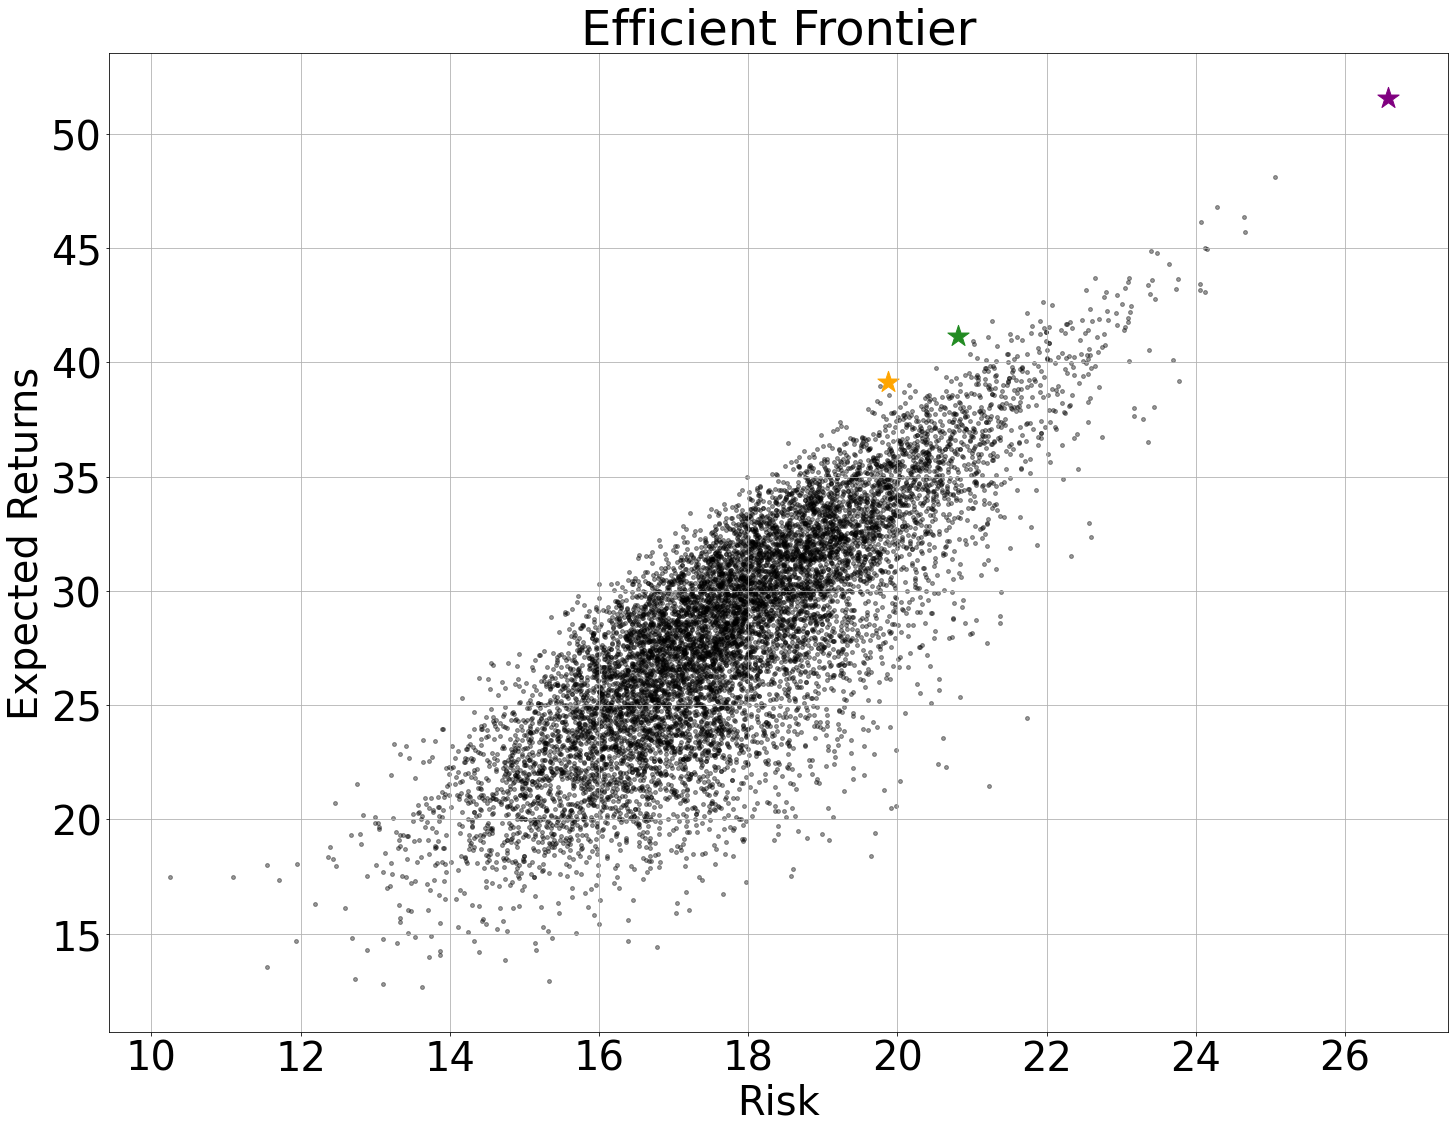

In [3]:
efficient_frontier(portfolios, 
                   benchmark = benchmark, 
                   alpha = .4, 
                   rf = rf["Adj Close"][-1], 
                   start = start, 
                   end = end, 
                   figsize = (24,18))
#the * is the optimal mean variance portfolio

### Sharpe Ratio
Below shows the highest optimal portfolio on the efficient frontier. This portfolio has the highest sharpe ratio: 
> Sharpe Ratio = (R<sub>Portfolio</sub> - R<sub>risk-free rate</sub>)/σ<sub>Portfolio</sub>

The sharpe ratio uses the portfolio returns and volatility and the risk-free rate to find how your returns compare to the level of risk. This is a very important portfolio performance tool that is widely used to explain to investors how their portfolio is aligned with their goals. Not every portfolio needs to the portfolio with the optimal sharpe ratio, instead it more corresponds with the level of risk you want to take and what returns you can expect for that. Particluarly for individual wealth managers this can assess where a client best fits with thier desired goals. 

Portfolio construction around this measure alone can help a top-down strategy as long as the manager has a understanding of capital markets and has a investable universe of stocks or ETFs. This measure is a start of portfolio construction. 

In [4]:
sharpe_portfolio = optimal_sharpe_portfolio(portfolios, 
                                            rf = rf["Adj Close"][-1])
sharpe_portfolio

Returns  Volatility  Portfolio Beta  Jensen's Alpha  JNJ Weight  \
3339  41.147097   20.817536        0.758483       39.685103    0.091464   

      AMZN Weight  GE Weight  DE Weight  BX Weight  AAPL Weight  KO Weight  \
3339     0.031879   0.005195   0.099961   0.152507      0.03554     0.0298   

      OKTA Weight  BND Weight  
3339     0.320495    0.233158

### Treynor Ratio


Similarly to the Sharpe Ratio, the Treynor Ratio shows risk-adjusted return of a portfolio. Both measures find the risk premium per unit of systematic risk. The difference in this measure is that it uses the beta parameter of the portfolio returns to the market/benchmark in which it operates in. In this way the Treynor Ratio compares the portfolio risk premium to the beta, or systematic risk of the portfolio. It meaures return per unit of risk. The formualtion looks like this: 
> Treynor Ratio = (R<sub>Portfolio</sub> - R<sub>risk-free rate</sub>)/	β<sub>Portfolio</sub>

Optimizing around this measure will generally give you the portfolio with the highest return you can get with lowest beta to the market. 

In [5]:
optimal_treynor = optimal_treynor_ratio(portfolios, 
                                        rf = rf["Adj Close"][-1])
optimal_treynor

Returns  Volatility  Portfolio Beta  Jensen's Alpha  JNJ Weight  \
8381  39.14552   19.871611        0.706491       37.684966    0.052526   

      AMZN Weight  GE Weight  DE Weight  BX Weight  AAPL Weight  KO Weight  \
8381     0.005635   0.009307   0.064806   0.090533     0.108944   0.012737   

      OKTA Weight  BND Weight  
8381     0.323955    0.331556

### Jensen's Alpha

Jensen's Alpha describes the excess return you are able to make based on luck, skill or additional risk you take above the market. Portfolio managers with high alpha values, simliar volatility, a beta close to one are outperforming the market and are selecting/allocating better than the market. That directly contridicts the semi-strong form of the efficient market hypothesis, that states the market is the most efficient capital allocater and selector of assets. Though portfolio managers that are generating alpha in that manner usually only generate small returns above the market that aren't sustainable in the long run. Take for example technical traders, they use past chart data to predict movements in stock prices in the short run. (Random Walk Down Wall Street) Even though they may be able to generate a fairly high alpha in the short run through there trading on those indicators. Long term trading would not would be benefitial and they would be far better off with a buy/hold strategy. Jensen's Alpha in my opinion is no more than a measure of short term outperformance that is not sustainable in the long run. Portfolio managers should focus more on risk/reward factors that contribute to a portfolios performance, that portfolio manager can still generate alpha through risk premiums and luck but should not try to maximize skill in generating portfolio alpha. 

In [6]:
optimal_jensens_alpha = optimal_jensens_alpha(portfolios)
optimal_jensens_alpha

Returns  Volatility  Portfolio Beta  Jensen's Alpha  JNJ Weight  \
4929  51.580613   26.569181        0.985037       50.112349    0.058185   

      AMZN Weight  GE Weight  DE Weight  BX Weight  AAPL Weight  KO Weight  \
4929     0.099801   0.048966   0.074157   0.129605       0.1059   0.046799   

      OKTA Weight  BND Weight  
4929     0.405761    0.030826

### Capital Asset Pricing Model
Developed by William Sharpe, Jack Treynor, John Lintner, and Jan Mossin the Capital Asset Pricing Model(CAPM), states that not all risks should affect asset prices. CAPM says that if a risk can be diversified away when held with other assets then that risk is no longer a real risk to the portfolio. Market risk is a risk that you cannot remove from any portfolio that operates within a market, explaining the components of this regression function. Thus far I have taken key prinicipals from this model including, Sharpe Ratio, Treynor Ratio, The Efficient Frontier, and Jensen's Alpha. Together you get a general sense of the Capital Asset Pricing Model with respect to diversifing away risk. Examining The Efficient Frontier shows us that there is clear benefit to diversification because it can provide you with the best possible combination of assets that will yeild you the best results based on returns and volatility. Running a regression on the market is the simple version of the Capital Asset Pricing Model and looks like this: 
> E(R) = α + β(E(R<sub>market</sub>) - R<sub>risk-free rate</sub>)

This model shows that the market is the only predictor of future returns and alpha measures the luck and/or skill of the investor along with the additional risk to the market that they take. Generally active portolio managers target generating alpha for their portfolios. Other portfolio managers may target a higher beta to the market which will generate them a higher return but still relies on the semi-strong from of the efficient market hypothesis that you can't truly outperform the overall market. Later Eugene Fama and Kenneth French came up with the 3 Factor Model.

### The Fama French Model
In 1992 Eugene Fama and Kenneth French expanded the traditional Capital Asset Pricing Model by adding additional factors to the regression function of asset pricing. They added the size factor, which takes the performance of large companies minus the performance of small companies, and the value factor, which takes the performance of high value assets minus low value assets. The new equation looks like this: 
> E(R) = α + β<sub>1</sub>(R<sub>market</sub>-R<sub>risk-free</sub>) + β<sub>2</sub>Size + β<sub>3</sub>Value
    

This model considers that value and small capitalization stocks perform better. Unlike the traditional Capital Asset Pricing Model, there are debates on whether or not the Fama French Model shows outperformance due to market efficiency or inefficiency. In support of efficiency, small and value assets face larger cost of capital and risk, explaining that the market is still efficient. In support of inefficiency, the market incorrectly prices the value of these factors. Fama and French state that investors that subcribe to the idea of a multifactor model must be tolerable to periods of high volatility and underperformance, they say that these factors are rewarded in the long run. In 2014 Fama and French included 2 other factors to their model. The first is profitability, which assumes that assets with higher future earnings will perform better in the market. The other is investment, which relates internal business investment and returns. The updated model changes to: 
> E(R) = α + β<sub>1</sub>(R<sub>market</sub>-R<sub>risk-free</sub>) + β<sub>2</sub>Size + β<sub>3</sub>Value + β<sub>4</sub>Profitabilty + β<sub>5</sub>Investment

This model is supposed to more accurately and more fully reflect predicting asset prices. 

### Individual Portfolio Returns

In [7]:
ports = portfolios.drop(["Returns", "Volatility", "Portfolio Beta"], axis = 1).T
ports

0          1          2          3          4     \
Jensen's Alpha  27.361431  19.733629  27.478305  25.519357  18.826793   
JNJ Weight       0.080414   0.192225   0.095468   0.121386   0.083013   
AMZN Weight      0.153219   0.044512   0.133189   0.084871   0.068877   
GE Weight        0.002502   0.144834   0.034398   0.031705   0.152602   
DE Weight        0.171318   0.206619   0.183891   0.111281   0.127151   
BX Weight        0.056315   0.047261   0.075738   0.142571   0.136518   
AAPL Weight      0.072737   0.180280   0.179226   0.041056   0.176016   
KO Weight        0.200831   0.151102   0.180002   0.177292   0.040877   
OKTA Weight      0.128246   0.029193   0.088941   0.117082   0.006393   
BND Weight       0.134418   0.003973   0.029146   0.172755   0.208552   

                     5          6          7          8          9     ...  \
Jensen's Alpha  25.663377  30.321497  29.361838  18.986384  23.892629  ...   
JNJ Weight       0.080586   0.184098   0.117214   0.194007   0.181032  ...   
AMZN Weight      0.152203   0.155986   0.161232   0.133764   0.040433  ...   
GE Weight        0.186094   0.173608   0.076455   0.065627   0.114213  ...   
DE Weight        0.174441   0.072401   0.040419   0.093714   0.082399  ...   
BX Weight        0.081382   0.012391   0.118158   0.108580   0.070656  ...   
AAPL Weight      0.091926   0.129414   0.051571   0.065520   0.194046  ...   
KO Weight        0.048718   0.017057   0.129198   0.156553   0.137815  ...   
OKTA Weight      0.091315   0.174057   0.152524   0.020532   0.094831  ...   
BND Weight       0.093335   0.080987   0.153228   0.161702   0.084575  ...   

                     9990       9991       9992       9993       9994  \
Jensen's Alpha  20.495596  37.328779  30.171390  24.309115  30.471331   
JNJ Weight       0.140909   0.033391   0.073970   0.109208   0.043292   
AMZN Weight      0.200686   0.016546   0.151406   0.170223   0.024999   
GE Weight        0.081990   0.058217   0.151241   0.139975   0.125854   
DE Weight        0.201908   0.101230   0.069896   0.129220   0.179819   
BX Weight        0.001746   0.234782   0.074078   0.156646   0.195608   
AAPL Weight      0.112436   0.133779   0.088782   0.027892   0.000741   
KO Weight        0.047598   0.169660   0.079365   0.060354   0.059022   
OKTA Weight      0.029704   0.225141   0.171635   0.063687   0.189295   
BND Weight       0.183024   0.027253   0.139627   0.142794   0.181369   

                     9995       9996       9997       9998       9999  
Jensen's Alpha  27.986554  32.451637  22.225676  33.915607  23.894671  
JNJ Weight       0.172444   0.173411   0.245383   0.122239   0.259851  
AMZN Weight      0.138809   0.137306   0.133887   0.219062   0.073237  
GE Weight        0.133828   0.138716   0.172285   0.056263   0.125665  
DE Weight        0.110297   0.077715   0.073744   0.091484   0.028868  
BX Weight        0.014352   0.013897   0.033666   0.110622   0.076947  
AAPL Weight      0.107072   0.054752   0.126542   0.208525   0.180981  
KO Weight        0.085227   0.131985   0.066955   0.015927   0.022743  
OKTA Weight      0.151804   0.226481   0.069583   0.127370   0.090864  
BND Weight       0.086167   0.045736   0.077954   0.048508   0.140844  

[10 rows x 10000 columns]

In [8]:
data_dct = {}
for ticker in ticker_lst:
    data_dct[ticker] = web.DataReader(ticker, 
                                      "yahoo", 
                                      start = start, 
                                      end = end)["Adj Close"]

stock_df = pd.DataFrame(data_dct)

pct_change_dct={}
for key in stock_df: 
    pct_change_dct[key + " Change"] = stock_df[key].pct_change()
pct_change_df = pd.DataFrame(pct_change_dct).fillna(0).T
pct_change_df

Date         2011-01-03  2011-01-04  2011-01-05  2011-01-06  2011-01-07  \
JNJ Change          0.0    0.008437   -0.000632   -0.001579   -0.009650   
AMZN Change         0.0    0.004288    0.013026   -0.008324   -0.001991   
GE Change           0.0    0.018052    0.001613   -0.004292   -0.007004   
DE Change           0.0   -0.006819    0.014695    0.000119    0.001068   
BX Change           0.0    0.012170   -0.000668    0.001336   -0.004673   
AAPL Change         0.0    0.005219    0.008180   -0.000808    0.007162   
KO Change           0.0   -0.020699   -0.005949   -0.007246   -0.001745   
OKTA Change         0.0    0.000000    0.000000    0.000000    0.000000   
BND Change          0.0    0.000124   -0.004365    0.000877    0.003755   

Date         2011-01-10  2011-01-11  2011-01-12  2011-01-13  2011-01-14  ...  \
JNJ Change    -0.007029    0.001770    0.003693    0.006560   -0.005722  ...   
AMZN Change   -0.004367   -0.001841   -0.001410    0.007877    0.017356  ...   
GE Change      0.004341    0.006483    0.002147   -0.003749    0.011828  ...   
DE Change      0.002846    0.012769    0.020897    0.023099    0.000558  ...   
BX Change     -0.010060    0.012872    0.022073    0.027487    0.016561  ...   
AAPL Change    0.018833   -0.002365    0.008137    0.003658    0.008100  ...   
KO Change      0.002225   -0.005868    0.005583    0.005711   -0.004259  ...   
OKTA Change    0.000000    0.000000    0.000000    0.000000    0.000000  ...   
BND Change     0.002369   -0.001990   -0.000624    0.003119   -0.001368  ...   

Date         2021-10-27  2021-10-28  2021-10-29  2021-11-01  2021-11-02  \
JNJ Change    -0.012127   -0.005435    0.000184    0.000860    0.015765   
AMZN Change    0.004864    0.015941   -0.021511   -0.016107   -0.001615   
GE Change     -0.033414    0.013577   -0.003705    0.012968    0.004330   
DE Change     -0.008559    0.033912   -0.021132    0.048027   -0.009617   
BX Change     -0.039885    0.021100    0.001012   -0.006141    0.046231   
AAPL Change   -0.003148    0.024992   -0.018156   -0.005607    0.007116   
KO Change      0.019277    0.009366    0.005889   -0.003548   -0.001246   
OKTA Change   -0.022291   -0.021519    0.010424    0.012218    0.013989   
BND Change     0.003640   -0.001287    0.000234   -0.000774    0.001878   

Date         2021-11-03  2021-11-04  2021-11-05  2021-11-08  2021-11-09  
JNJ Change    -0.003201   -0.002787   -0.007108   -0.003427    0.001594  
AMZN Change    0.021508    0.027482    0.012076   -0.008528    0.005606  
GE Change     -0.006749   -0.007172    0.033552   -0.002943    0.052666  
DE Change     -0.034478    0.022737    0.012398    0.015935   -0.015269  
BX Change      0.003960    0.000208   -0.013700   -0.003578    0.003802  
AAPL Change    0.009799   -0.003499    0.003582   -0.005553   -0.000997  
KO Change      0.003387    0.005507    0.004240   -0.008973   -0.000179  
OKTA Change    0.002168    0.005703   -0.003168    0.012005    0.008723  
BND Change    -0.001758    0.004578    0.003038   -0.002213    0.003094  

[9 rows x 2733 columns]

In [9]:
#port_returns_dct = {}
#for key in ports:
#    port_returns_dct[key] = ports[key].mul(pct_change_df)
#port_returns_dct

### Financial Democratization
Democratizing finance is one area where this hypothesis is tested. Increased "gambling" in financial markets by retail traders. Capital stock is allocated with perfect correlation with all available financial decision making data available. As we have seen with Gamestop (GME) and AMC Theatres (AMC), where capital was allocated by retail "gamblers" and effectively disrupted the efficiect flow of capital to those failing and declining industries. In Bing Han and Alok Kumar's article, in the Journal of Financial and Quantitative Analysis, "Speculative Retail Trading and Asset Prices" they state that: 
> "We find that stocks with high retail trading proportion (RTP) have strong lottery features and they attract retail investors with strong gambling propensity. Furthermore, these stocks tend to be overpriced and earn significantly negative alpha. The average monthly return differential between the extreme RTP quintiles is -0.60%. This negative RTP premium is stronger among stocks that have lottery features or are located in regions where people exhibit stronger gambling propensity. Collectively, these results indicate that speculative retail trading affects stock prices."

This strenthens my case that capital is increasing be allocated inefficiently by retail investors and that this should be factored into the mindset of managers during portfolio construction. 

Increased informativeness amongst these retail traders also plays a crucial role in the behavioral bias in the market. Information sharing of retail traders through social media can create a clouded retail bias. Decisions that would require further analysis by invdividuals to create a efficient decision process for an efficient market are thrown out by a group think mentality such as "we like the stock" or the Elon Musk "cult". However, I can make the claim that though information sharing sites enable group think, it also gives retail traders the opportuntity to become better informed and make better capital alllocation decisions, with only a minority falling into group think. 

Another point to make with increased retail trade volume is the fact that with increased volume allows for increased market liquidity, a important factor when making capital allocation decisions. Menachem Meni Abudy states in his article "Retail investors’ trading and stock market liquidity": 
> "The findings show a positive and significant relation between retail investors’ trading and stock market liquidity. Examination of the determinants of retail investors’ trading reveals that, on average, retail investors with more diversified trading activity tend to trade when liquidity is higher, the frequency of their arrival to the market is not affected by the level of liquidity, and retail investors are willing to trade at a lower liquidity level as sellers than as buyers. Moreover, retail investors’ trading does not create price noise at the aggregate market level. Overall, the evidence suggests that retail investors contribute to market quality."

His paper studies the behavior between between retail traders participation and the overall stock market liquidity. 

## Volatility Based Pricing

In [10]:
import hurst

### Relative Strength Indexing 

In [11]:
from mylib.RSI import *

In [12]:
data_dct = {}
for ticker in ticker_lst:
    data_dct[ticker] = RSIcalc(ticker, start = start, end = end)
data_dct

{'JNJ':              Adj Close       MA200  Price Change    Upmove  Downmove  \
 Date                                                                   
 2011-10-17   47.956097   47.055482     -0.014369  0.000000  0.014369   
 2011-10-18   48.429707   47.067674      0.009876  0.009876  0.000000   
 2011-10-19   47.091537   47.071235     -0.027631  0.000000  0.027631   
 2011-10-20   47.008839   47.074528     -0.001756  0.000000  0.001756   
 2011-10-21   47.948574   47.082886      0.019991  0.019991  0.000000   
 ...                ...         ...           ...       ...       ...   
 2021-11-03  165.059998  164.690970     -0.003201  0.000000  0.003201   
 2021-11-04  164.600006  164.720032     -0.002787  0.000000  0.002787   
 2021-11-05  163.429993  164.734310     -0.007108  0.000000  0.007108   
 2021-11-08  162.869995  164.733858     -0.003427  0.000000  0.003427   
 2021-11-09  163.095001  164.712441      0.001382  0.001382  0.000000   
 
               Ave Up  Ave Down        RS 

In [13]:
RSI_dct = {}
for key in data_dct:
    RSI_dct[key + " RSI"] = data_dct[key]["RSI"]
RSI = pd.DataFrame(RSI_dct)

In [14]:
signal_dct = {}
for key in data_dct: 
    signal_dct[key] = getSignals(data_dct[key])
signal_dct

{'JNJ': ([Timestamp('2012-04-16 00:00:00'),
   Timestamp('2012-04-20 00:00:00'),
   Timestamp('2013-08-23 00:00:00'),
   Timestamp('2013-08-28 00:00:00'),
   Timestamp('2013-12-13 00:00:00'),
   Timestamp('2013-12-18 00:00:00'),
   Timestamp('2014-01-27 00:00:00'),
   Timestamp('2014-01-28 00:00:00'),
   Timestamp('2014-01-29 00:00:00'),
   Timestamp('2014-01-30 00:00:00'),
   Timestamp('2014-01-31 00:00:00'),
   Timestamp('2014-02-03 00:00:00'),
   Timestamp('2014-02-04 00:00:00'),
   Timestamp('2014-02-05 00:00:00'),
   Timestamp('2014-02-06 00:00:00'),
   Timestamp('2014-07-18 00:00:00'),
   Timestamp('2014-08-04 00:00:00'),
   Timestamp('2014-10-14 00:00:00'),
   Timestamp('2014-10-15 00:00:00'),
   Timestamp('2014-10-17 00:00:00'),
   Timestamp('2014-12-16 00:00:00'),
   Timestamp('2014-12-17 00:00:00'),
   Timestamp('2015-06-09 00:00:00'),
   Timestamp('2015-08-24 00:00:00'),
   Timestamp('2015-08-25 00:00:00'),
   Timestamp('2015-08-26 00:00:00'),
   Timestamp('2016-01-11 00:00:

In [15]:
for key in signal_dct:
    plt.figure(figsize = (20,10))
    plt.scatter(signal_dct[key].loc[buy].index, 
                signal_dct[key].loc[buy]["Adj Close"], 
                marker = "^", 
                c = "forestgreen")
    #plt.scatter(data_dct[key].loc[sell].index,
     #           data_dct[key].loc[sell]["Adj Close"], 
     #           marker = "*",
     #           c = "red")
    plt.plot(data_dct[key]["Adj Close"], alpha = 0.7)

AttributeError: 'tuple' object has no attribute 'loc'

<Figure size 1440x720 with 0 Axes>